<class 'list'>


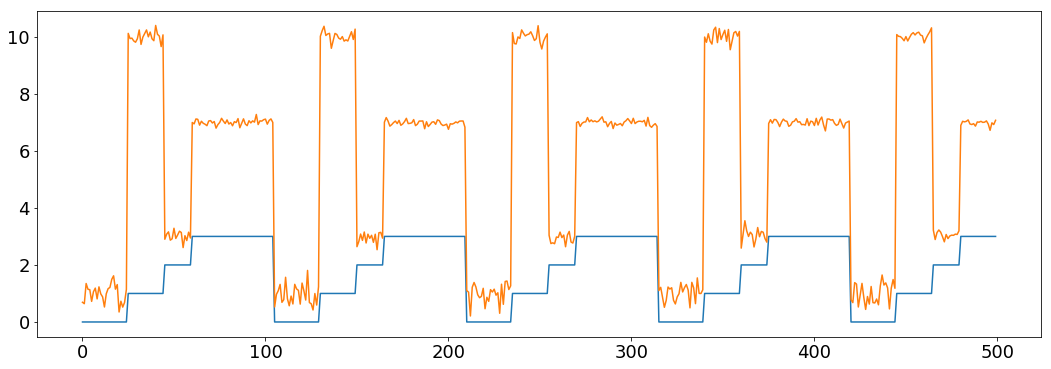

In [31]:
gen = generator.Sequence(500,alpha, type = 'continue',
                              params={'a': {'len': [25, 25], 'depend_on': False},
                                      'c': {'len': [15, 15], 'depend_on': False},                                       
                                      'b': {'len': [20, 20], 'depend_on': False},
                                      'd': {'len': [45, 45], 'depend_on': False},
                                      'e': {'len': [15, 15], 'depend_on': False}
                                     },     mean = [1, 10 , 3, 7] ,
                                            variance = [0.3, 0.15, 0.2, 0.1, 0.14])
plt.plot(gen.path)
plt.plot(gen.sequence)
gen.mean[1]
print(type(gen.sequence))

500
<class 'list'>


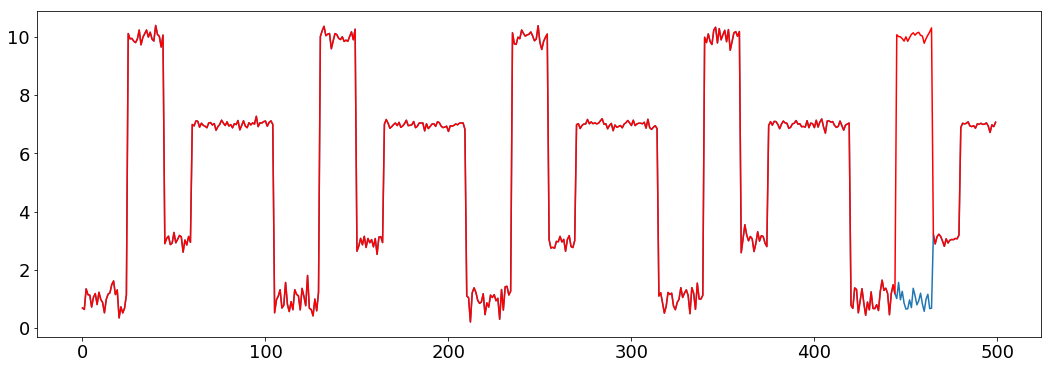

In [32]:
x = gen.get_abnormal_signal()
print(len(x))
plt.plot(x)
print(type(x))
plt.plot(gen.sequence,'r')

In [36]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/kirill/Projects/nir')
sys.path.append('/home/kirilman/Projects/nir/nir/')
import myutils
import sequence_generator as generator
import numpy as np
import matplotlib.pylab as plt
from pomegranate import *
from myutils import frequency_occurrence
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'figure.figsize':[18,6]})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
def anomal_probability(model, sequence_states):
    #индек состояния в матрице и состояний в последовательности состояний
    n = model.node_count() - 2
    print('Кол. состояний ', n)
    p = 1
    A = model.dense_transition_matrix()
#     print(A,sep='__')
    for i_pred, i_cur in zip(sequence_states,sequence_states[1:]):
        p *=A[i_pred, i_cur]
    print(p)
    return p

### Сигнал

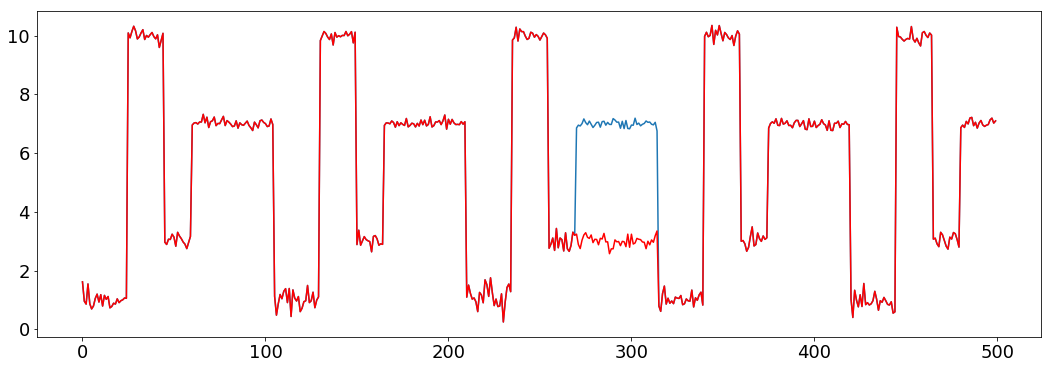

In [81]:
alpha = ['a','b','c','d']
N = 500
n_comp = 4
GenNormal = generator.Sequence(N,alpha, type = 'continue',
                              params={'a': {'len': [25, 25], 'depend_on': False},
                                      'c': {'len': [15, 15], 'depend_on': False},                                       
                                      'b': {'len': [20, 20], 'depend_on': False},
                                      'd': {'len': [45, 45], 'depend_on': False},
                                      'e': {'len': [15, 15], 'depend_on': False}
                                     },     mean = [1, 10 , 3, 7] ,
                                            variance = [0.3, 0.15, 0.2, 0.1, 0.14])

signal_1 = GenNormal.sequence
labels = list(map(myutils.rename_state,GenNormal.path))
anomal = generator.Sequence(N, ['a','b','c','d'],type = 'continue',
                              params={'a': {'len': [15, 15], 'depend_on': False},
                                      'c': {'len': [15, 15], 'depend_on': False},                                       
                                      'b': {'len': [10, 10], 'depend_on': False},
                                      'd': {'len': [40, 40], 'depend_on': False},
                                      'e': {'len': [15, 15], 'depend_on': 'd'}
                                     },     mean = [1, 10 , 3, 7] ,
                                            variance = [0.3, 0.15, 0.2, 0.1, 0.14]).sequence
anomal = GenNormal.get_abnormal_signal()

plt.plot(signal_1)
plt.plot(anomal,'r')
# plt.plot(anomal,'r')

log нормал -576.4731207621809
log аномал -644.1732510374194


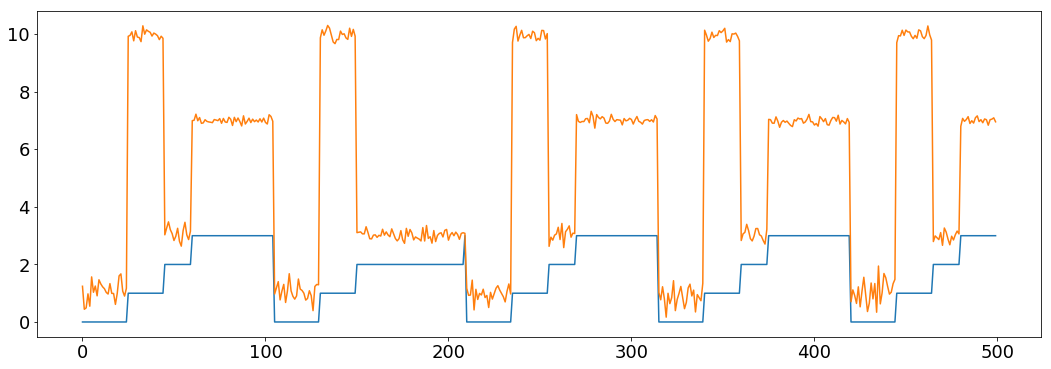

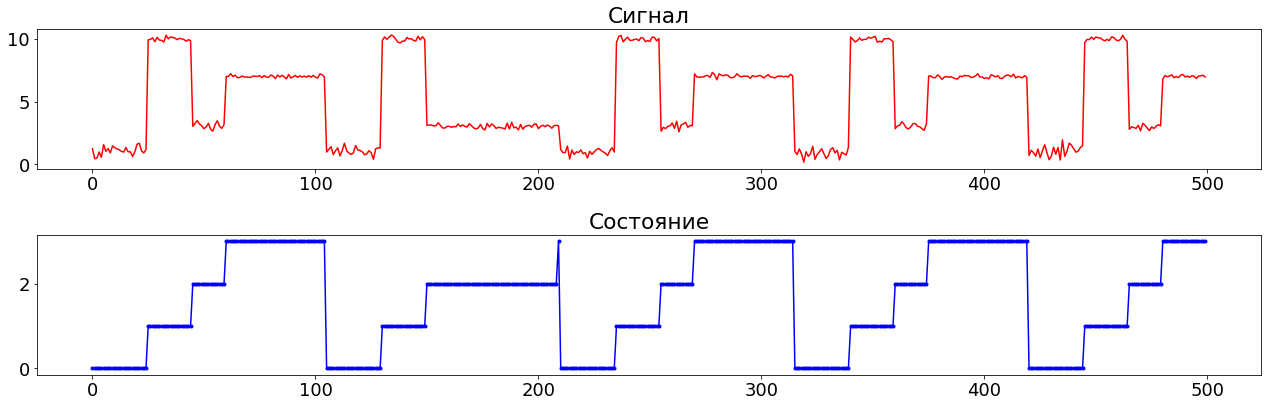

In [19]:
model = HiddenMarkovModel.from_samples(NormalDistribution, n_components = n_comp, X = [signal_1],
                                      labels = [labels], algorithm = 'labeled')

sequence_states = [x[0] for x in model.viterbi(anomal)[1]][1:]
plt.plot(sequence_states)
plt.plot(anomal)
print('log нормал',model.log_probability(signal_1))
print('log аномал',model.log_probability(anomal))

fig, axes = plt.subplots(2,1)
axes[0].plot(anomal,'r')
axes[0].set_title('Сигнал')
axes[1].set_title('Состояние')
axes[1].plot(sequence_states,'b')
axes[1].plot(sequence_states,'b.')
plt.tight_layout()
plt.savefig('состояние.jpeg')

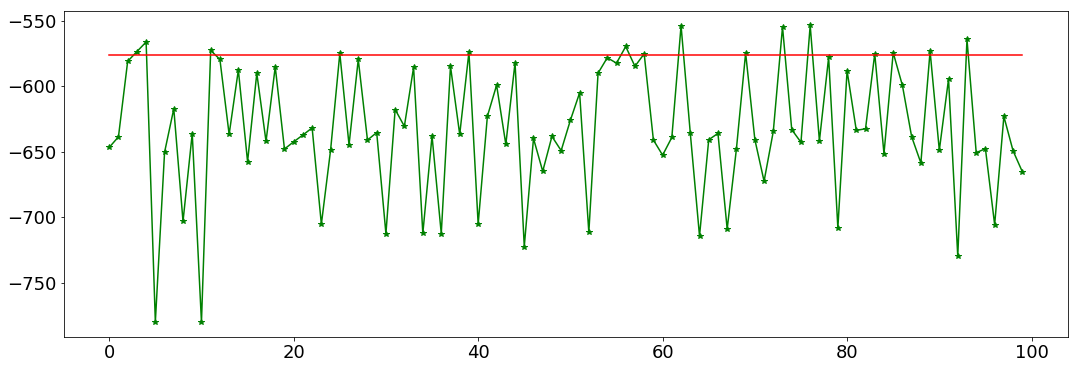

In [20]:
anomals = [GenNormal.get_abnormal_signal(count=3) for i in range(100)]
# print(model.log_probability(signal_1))
log_prob_normal = model.log_probability(signal_1)
arr_log = []
numbers = []
for k, s in enumerate(anomals):
    p = model.log_probability(s)
    arr_log +=[p]
    if p > log_prob_normal:
        numbers +=[k]
plt.plot(arr_log,'g')
plt.plot(arr_log,'g*')
plt.plot([log_prob_normal]*len(anomals),'r')

In [21]:
seq_states = [fmodel.predict_proba(anomals[99])
anomal_probability(model, seq_states)

Кол. состояний  4


IndexError: arrays used as indices must be of integer (or boolean) type

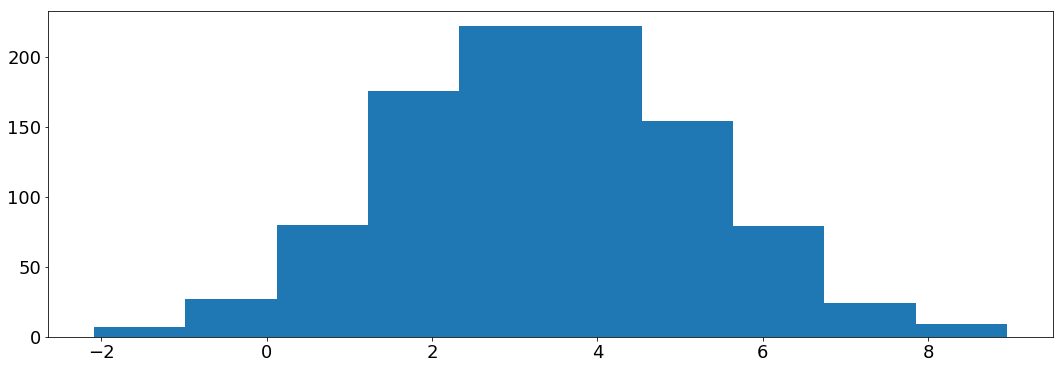

In [55]:
model.states[2].distribution.plot()

10


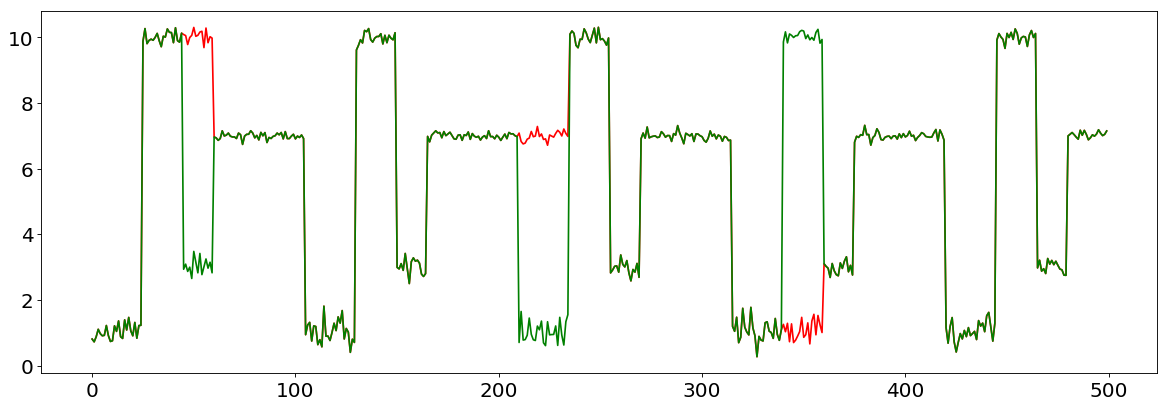

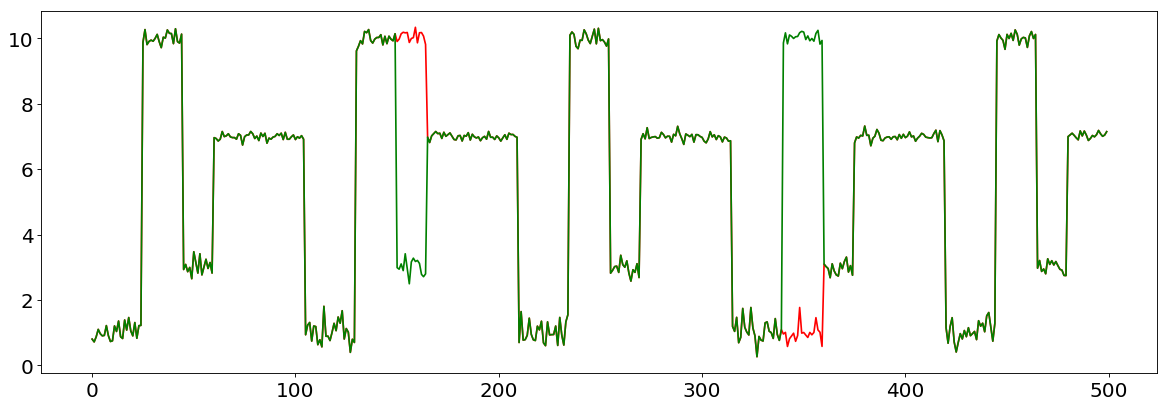

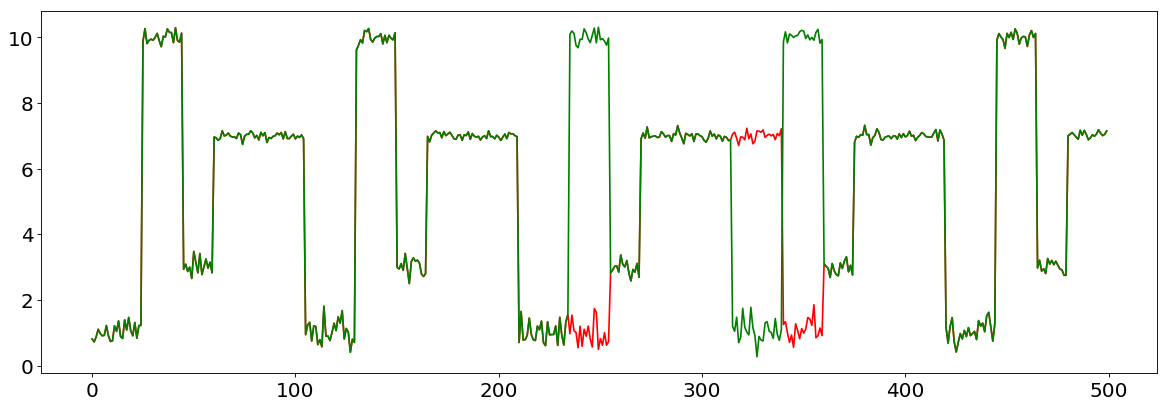

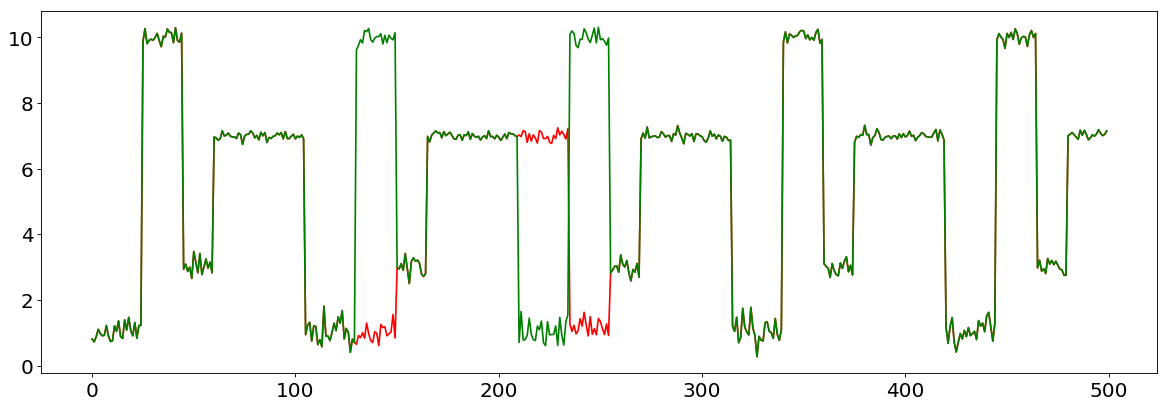

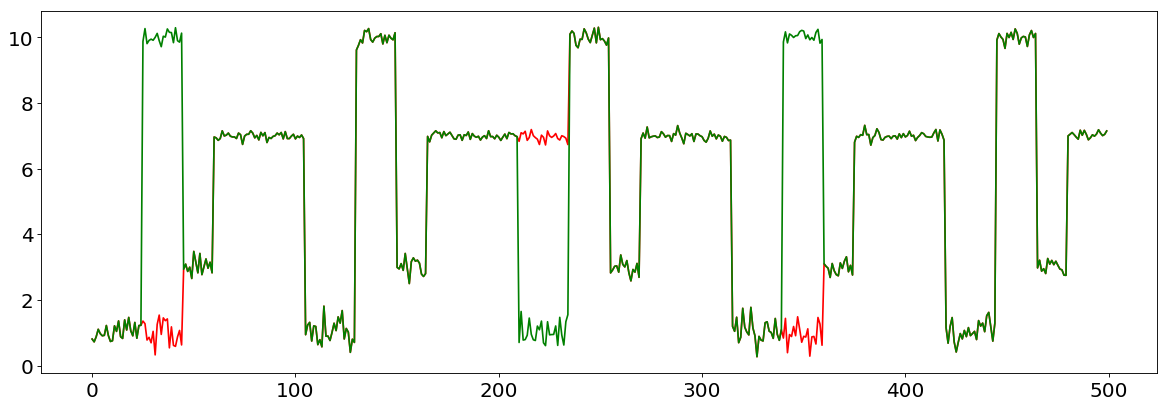

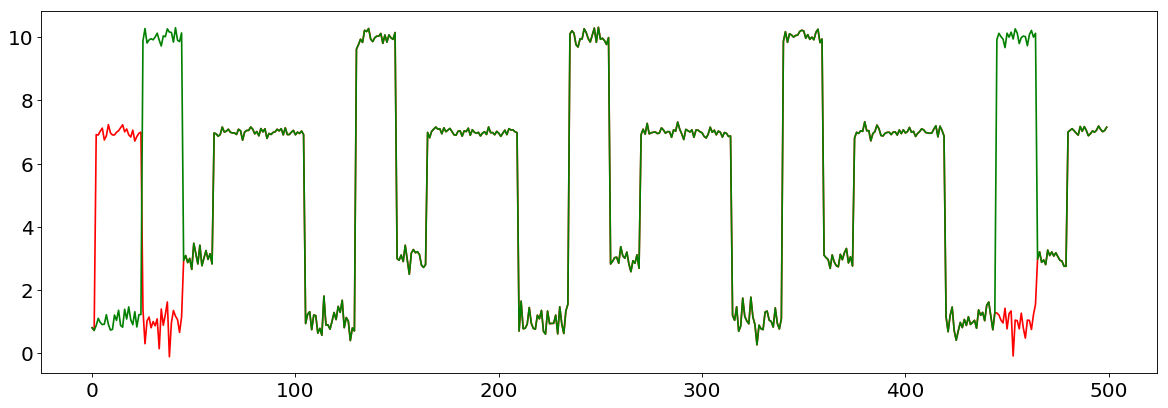

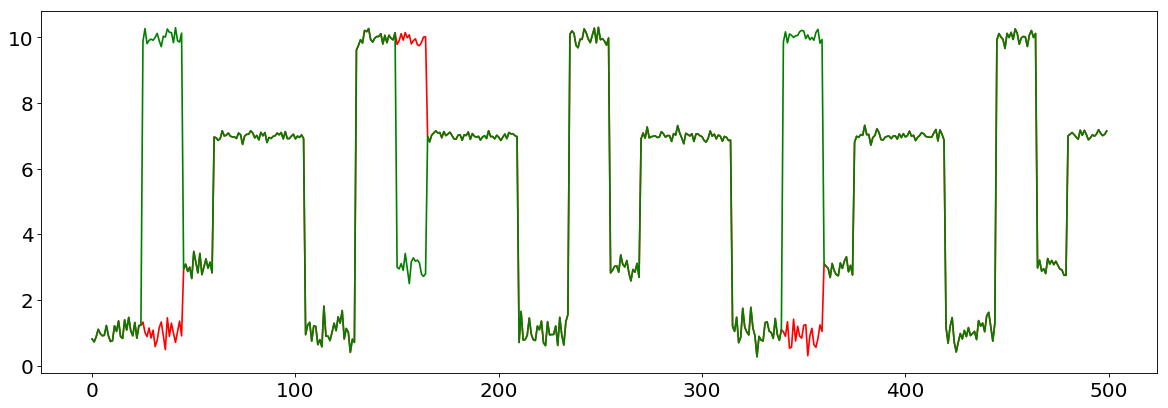

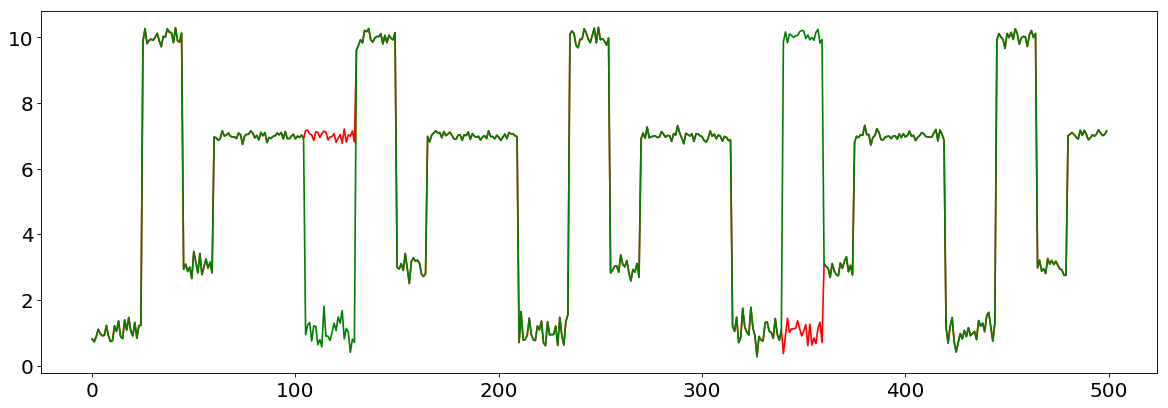

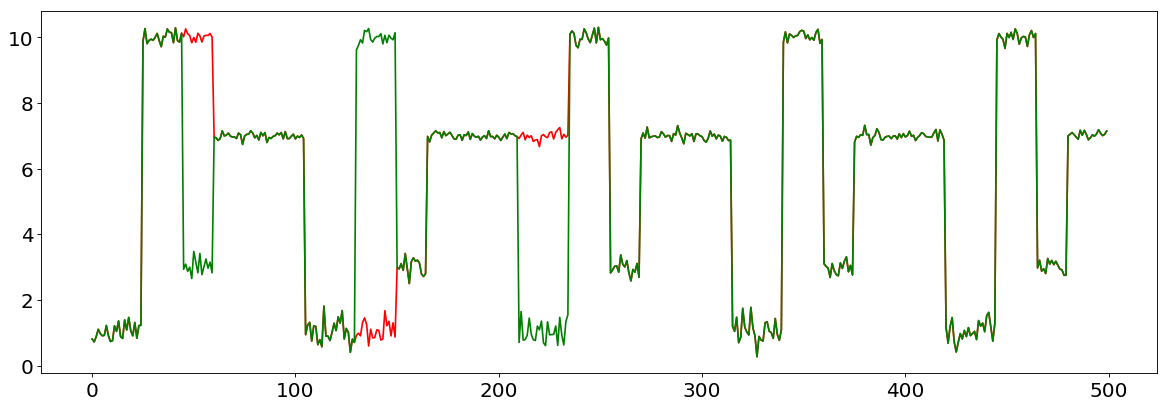

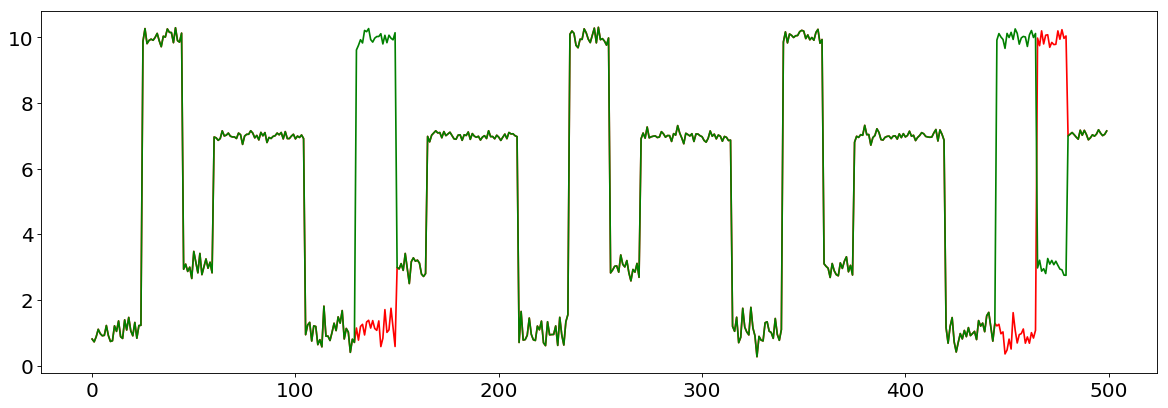

In [56]:
print(len(numbers))
for k in numbers:
    fig = plt.figure(dpi = 80)
    plt.plot(anomals[k],'r')
    plt.plot(signal_1,'g')


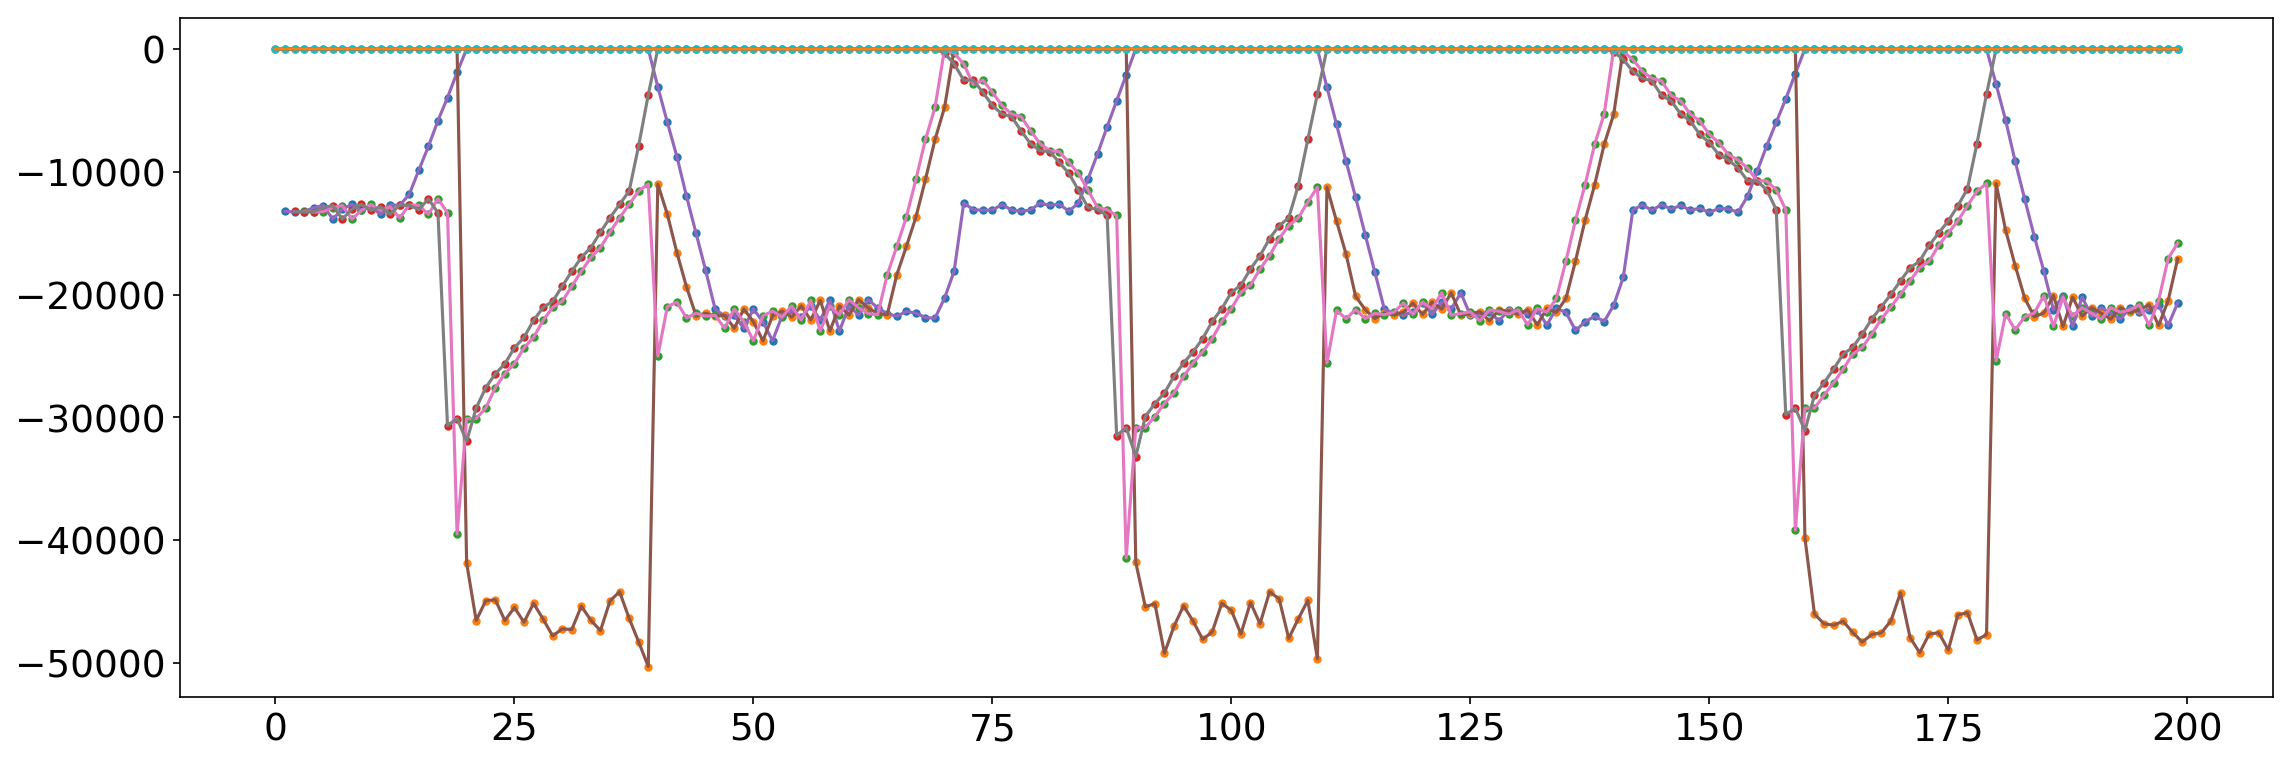

In [78]:
figure = plt.figure(dpi= 150)
plt.plot(model.predict_log_proba(anomal[:200]),'.')
plt.plot(model.predict_log_proba(anomal[:200]))

plt.plot(anomal[:200],'.')
plt.plot(anomal[:200])

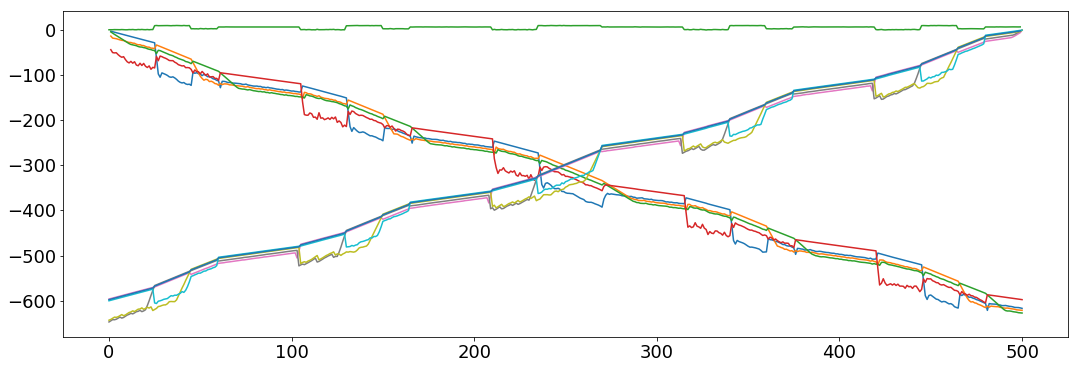

In [58]:
plt.plot(model.forward(anomal))
plt.plot(model.backward(anomal))
plt.plot(anomal)

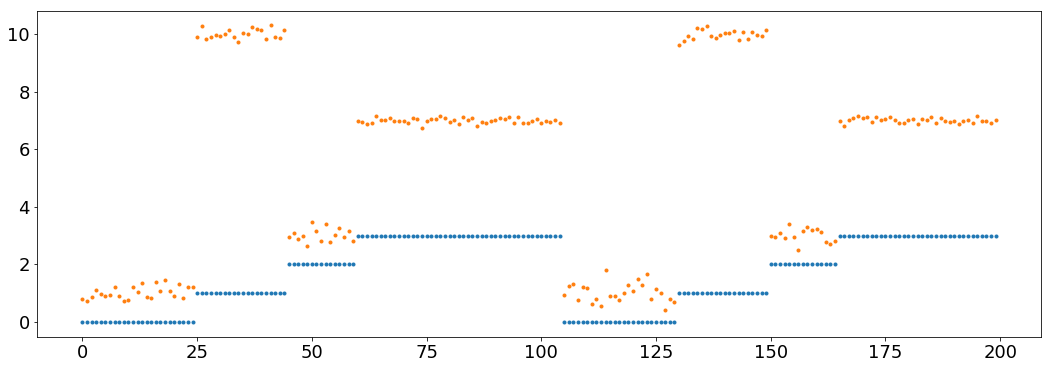

In [59]:
c = 200
sequence_states = [x[0] for x in model.maximum_a_posteriori(anomal[:c])[1]][0:]
plt.plot(sequence_states,'.')
plt.plot(anomal[:c],'.')

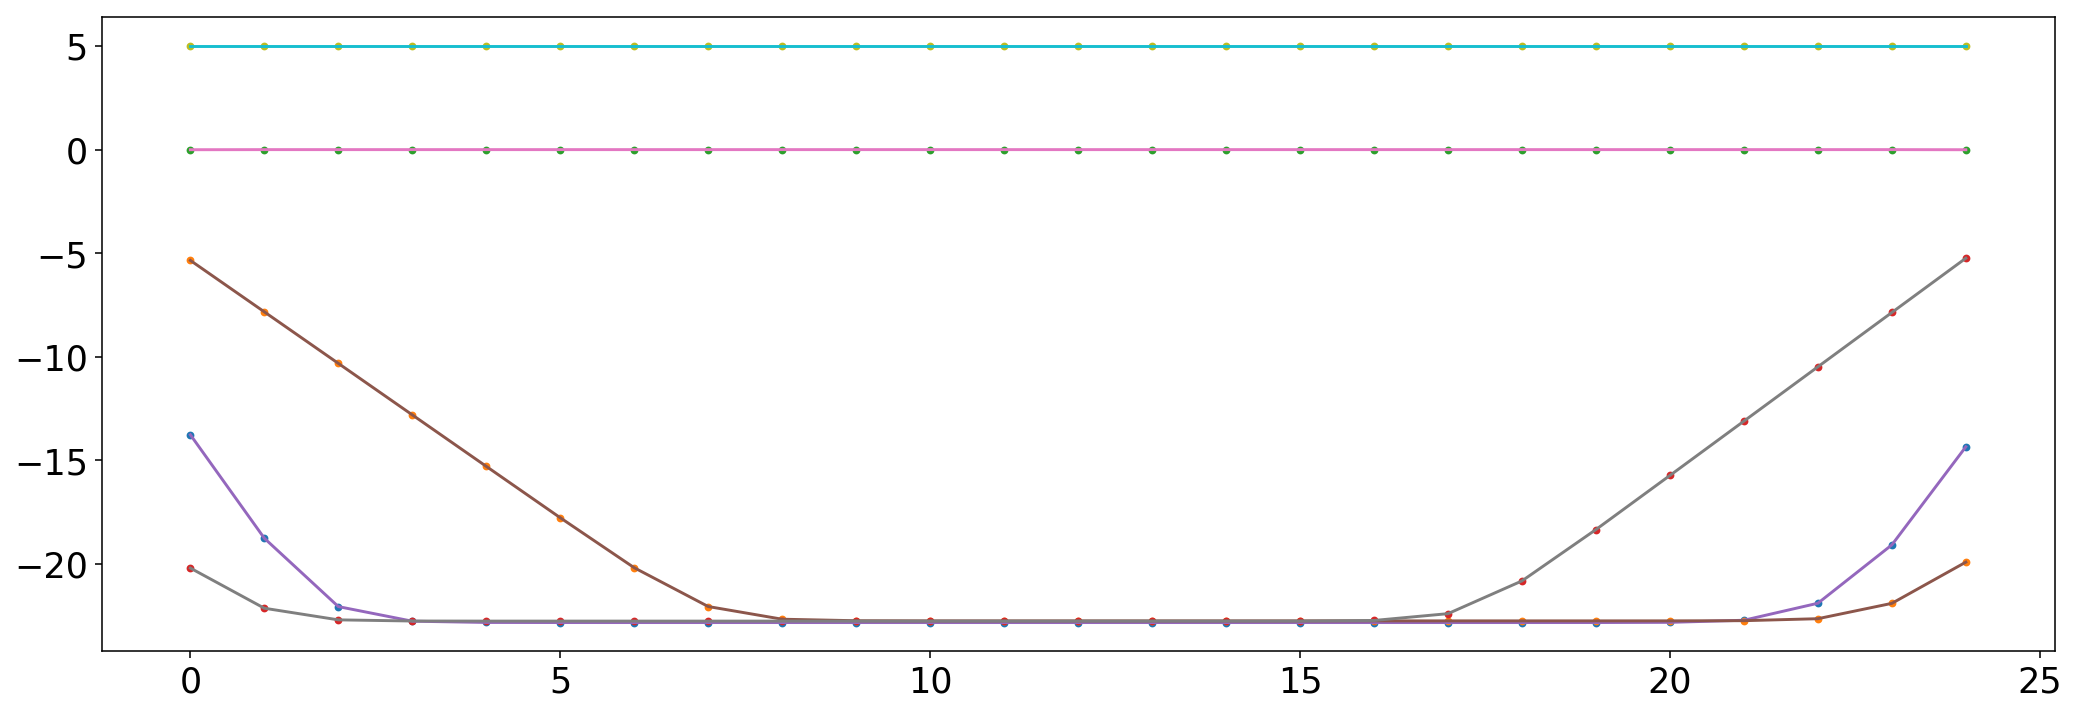

In [60]:
figure = plt.figure(dpi= 140)
t = np.array([5]*25)
plt.plot(model.predict_log_proba(t[:200]),'.')
plt.plot(model.predict_log_proba(t[:200]))

plt.plot(t[:200],'.')
plt.plot(t[:200])

In [61]:
print(myutils.print_model_distribution(model))

Количество параметров распределения больше 1, равно 
Количество параметров распределения больше 1, равно 
Количество параметров распределения больше 1, равно 
Количество параметров распределения больше 1, равно 
 Состояние  Вероятность испускания
        s0: m = 1.2201076763308611, v = 1.078980275974861 
        s1: m = 9.560065487983843, v = 1.9315362659160953 
        s2: m = 3.47636377808436, v = 1.7705577826866905 
        s3: m = 6.893703357343753, v = 0.6682292979571877 
None-start: 
  None-end: 
        s0    s1    s2    s3    
s0    9.60E-01  4.00E-02  0.00E+00  0.00E+00  
s1    0.00E+00  9.50E-01  5.00E-02  0.00E+00  
s2    0.00E+00  0.00E+00  9.33E-01  6.67E-02  
s3    2.01E-02  0.00E+00  0.00E+00  9.80E-01  
       s0      s1      s2      s3
s0  0.960   0.040   0.000   0.000   
s1  0.000   0.950   0.050   0.000   
s2  0.000   0.000   0.933   0.067   
s3  0.020   0.000   0.000   0.980   



In [62]:
p = anomal_probability(model, sequence_states)
if p < 0:
    print('Аномал')

Кол. состояний  4
2.1320139733734023e-13


In [63]:
def get_anomal():
    alpha = ['a','b','c']
    N = 500
    signal_1 = generator.Sequence(N,alpha, type = 'continue',
                                  params={'a': {'len': [20, 20], 'depend_on': False},
                                          'c': {'len': [30, 30], 'depend_on': False},                                       
                                          'b': {'len': [20, 20], 'depend_on': False},
                                          'd': {'len': [45, 45], 'depend_on': False},
                                          'e': {'len': [15, 15], 'depend_on': False}
                                         },     mean = [1,10, 3] ,
                                                variance = [0.03, 0.15, 0.1, 0.1, 0.14]).sequence

    signal_2 = generator.Sequence(N,alpha, type = 'continue',
                                   params={'a': {'len': [20, 20], 'depend_on': False},
                                           'c': {'len': [30, 30], 'depend_on': False},
                                           'b': {'len': [20, 20], 'depend_on': False},
                                           'd': {'len': [45, 45], 'depend_on': False},
                                           'e': {'len': [15, 15], 'depend_on': False},
                                     },     mean = [10,15,2] , 
                                            variance = [0.5, 0.5, 0.5, 0.1, 0.14]).sequence

    signal_3 = generator.Sequence(N,alpha, type = 'continue',
                                   params={'a': {'len': [20, 20], 'depend_on': False},
                                           'c': {'len': [30, 30], 'depend_on': False},
                                           'b': {'len': [20, 20 ], 'depend_on': False},
                                           'd': {'len': [45, 45], 'depend_on': False},
                                           'e': {'len': [15, 15], 'depend_on': False},
                                     },     mean = [12, 22, 12] , 
                                            variance = [0.25, 0.25, 0.25, 0.1, 0.14]).sequence
    test = [signal_1, signal_2, signal_3]
    # signal = np.array([signal_1, signal_2, signal_3]).T
    signal = []
    for a,b,c in zip(signal_1,signal_2,signal_3):
        signal += [[a,b]]
    return signal
anomal = get_anomal()
alpha = ['a','b','c','d']
N = 500
signal_1 = generator.Sequence(N,alpha, type = 'continue',
                              params={'a': {'len': [30, 30], 'depend_on': False},
                                      'c': {'len': [15, 15], 'depend_on': False},                                       
                                      'b': {'len': [20, 20], 'depend_on': False},
                                      'd': {'len': [45, 45], 'depend_on': False},
                                      'e': {'len': [15, 15], 'depend_on': False}
                                     },     mean = [1,10, 3, 15] ,
                                            variance = [0.03, 0.15, 0.1, 0.1, 0.14]).sequence

signal_2 = generator.Sequence(N,alpha, type = 'continue',
                               params={'a': {'len': [30, 30], 'depend_on': False},
                                       'c': {'len': [15,  15], 'depend_on': False},
                                       'b': {'len': [20,20 ], 'depend_on': False},
                                       'd': {'len': [45, 45], 'depend_on': False},
                                       'e': {'len': [15, 15], 'depend_on': False},
                                 },     mean = [10,15,2,15] , 
                                        variance = [0.25, 0.25, 0.25, 0.1, 0.14]).sequence

signal_3 = generator.Sequence(N,alpha, type = 'continue',
                               params={'a': {'len': [30, 30], 'depend_on': False},
                                       'c': {'len': [15, 15], 'depend_on': False},
                                       'b': {'len': [20, 20 ], 'depend_on': False},
                                       'd': {'len': [45, 45], 'depend_on': False},
                                       'e': {'len': [15, 15], 'depend_on': False},
                                 },     mean = [12, 20, 15,15] , 
                                        variance = [0.25, 0.25, 0.25, 0.1, 0.14]).sequence
test = [signal_1, signal_2, signal_3]
# signal = np.array([signal_1, signal_2, signal_3]).T
signal = []
for a,b,c in zip(signal_1,signal_2,signal_3):
    signal += [[a,b]]
# signal.shape
signal[:][0]

[0.9572675263569981, 9.91006610741884]

In [74]:
model = HiddenMarkovModel.from_samples(MultivariateGaussianDistribution , n_components = 4, X = [signal])

In [65]:
model.predict_proba(signal).shape

(500, 4)

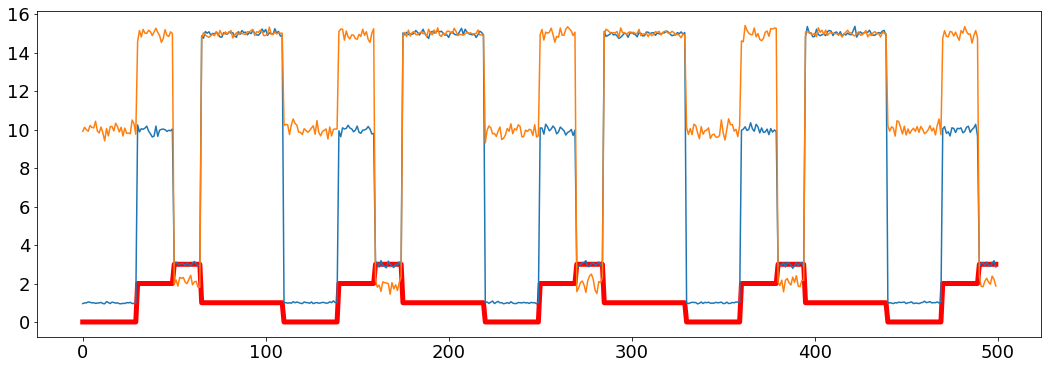

In [66]:
label = [x[0] for x in model.viterbi(signal)[1]][1:]
plt.plot(label,'r',linewidth=5)
plt.plot(signal)

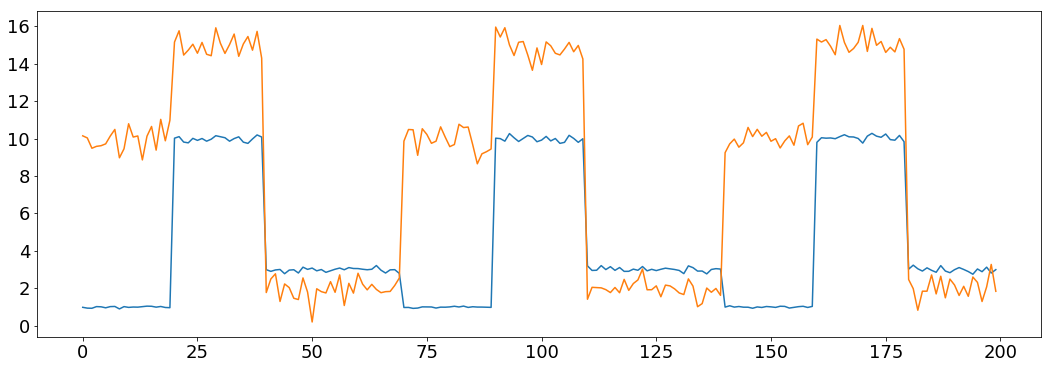

In [67]:
plt.plot(anomal[:200])

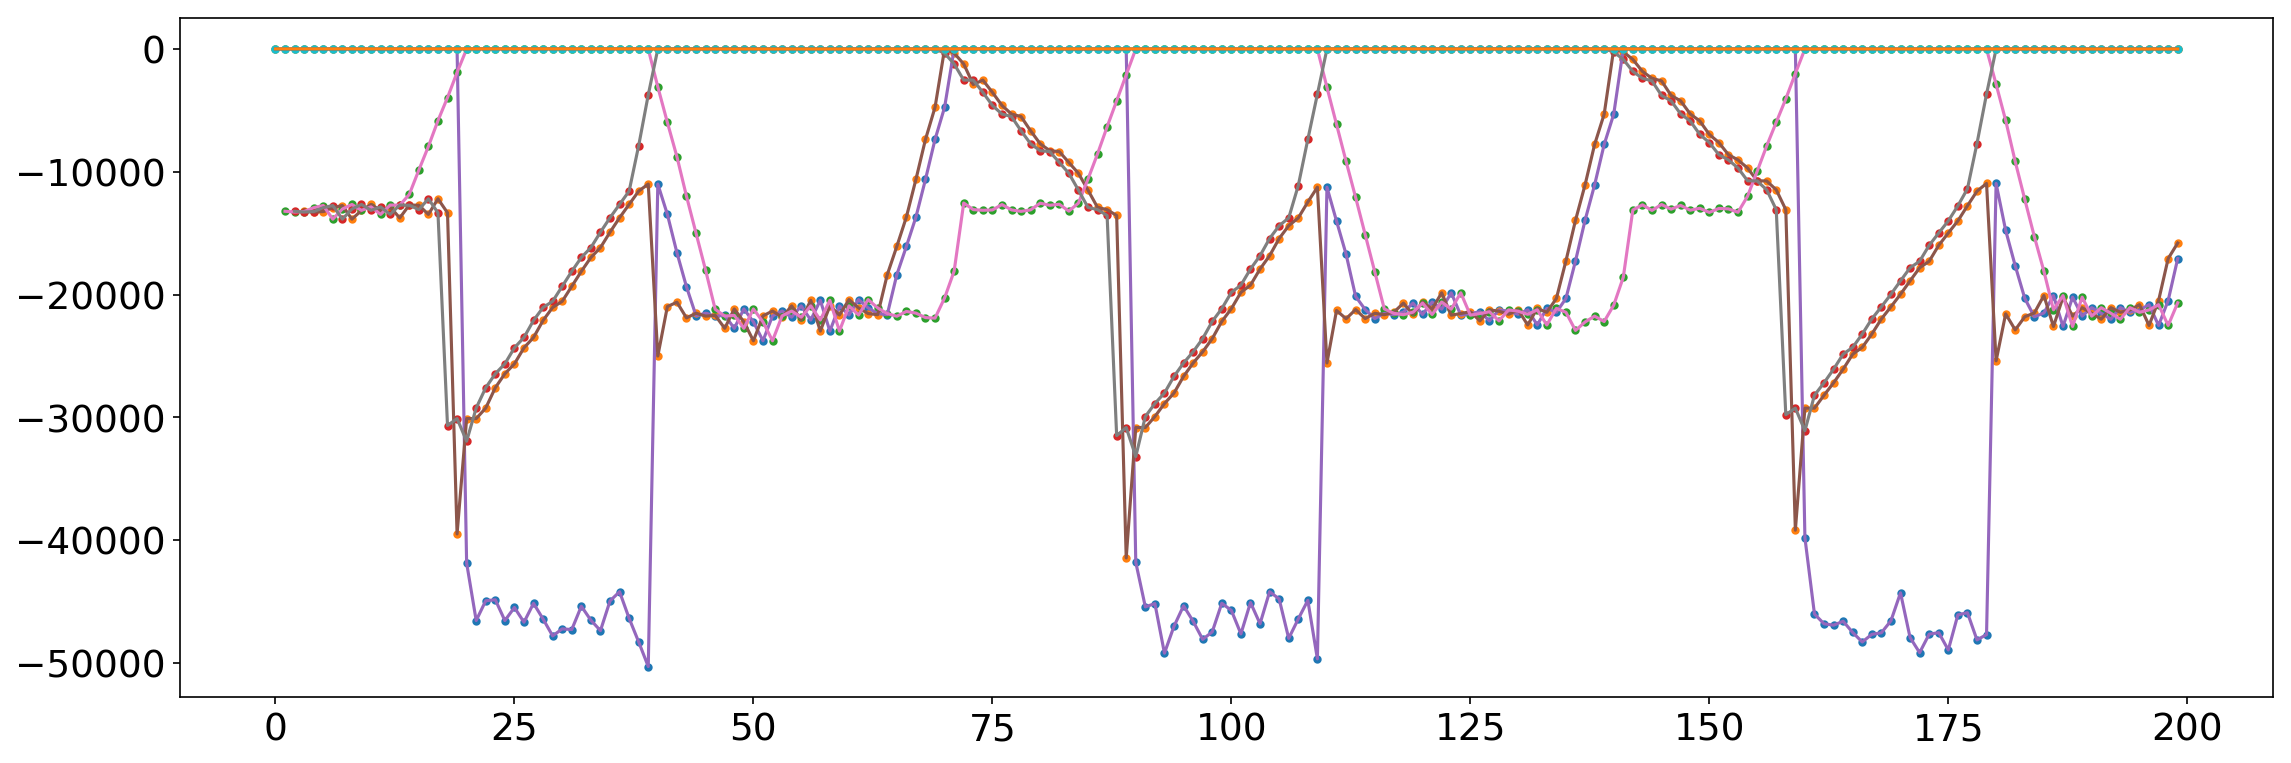

In [68]:
figure = plt.figure(dpi= 150)
plt.plot(model.predict_log_proba(anomal[:200]),'.')
plt.plot(model.predict_log_proba(anomal[:200]))

plt.plot(anomal[:200],'.')
plt.plot(anomal[:200])

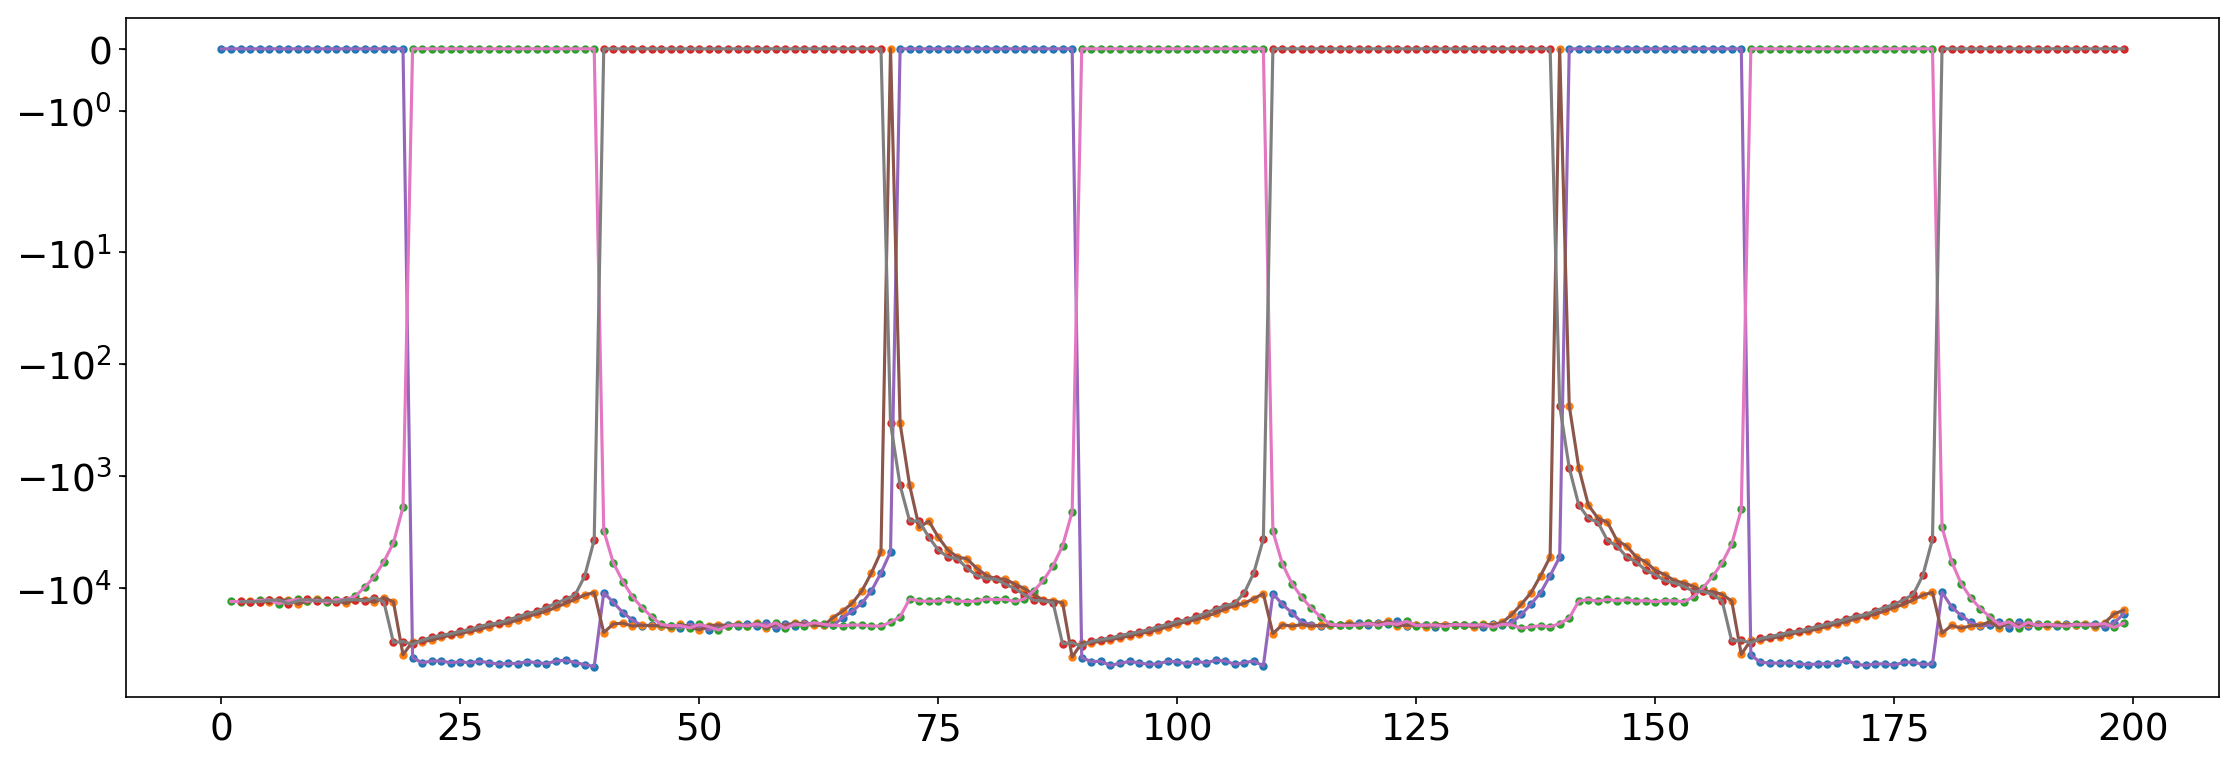

In [69]:
figure = plt.figure(dpi= 150)
plt.plot(model.predict_log_proba(anomal[:200]),'.')
plt.plot(model.predict_log_proba(anomal[:200]))
plt.yscale('symlog')

# plt.plot(anomal[:200],'.')
# plt.plot(anomal[:200])

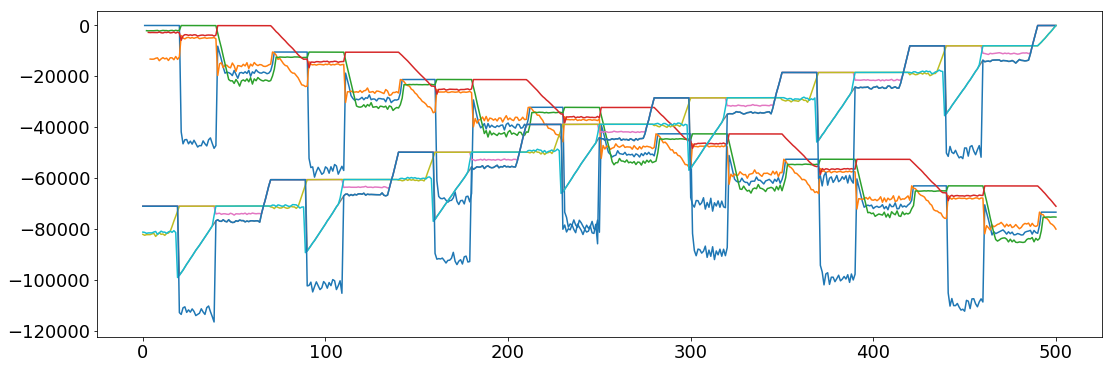

In [70]:
plt.plot(model.forward(anomal))
plt.plot(model.backward(anomal))
# plt.plot(anomal)

-699463213.6357294
-71096.6518348332


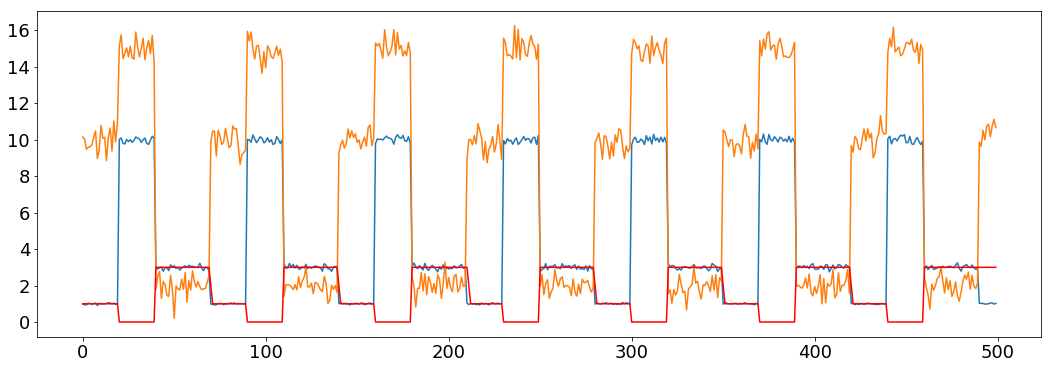

In [76]:
sequence_states = [x[0] for x in model.viterbi(anomal)[1]][1:]

plt.plot(anomal)
plt.plot(sequence_states,'r')
print(model.log_probability(signal_1))
print(model.log_probability(anomal))

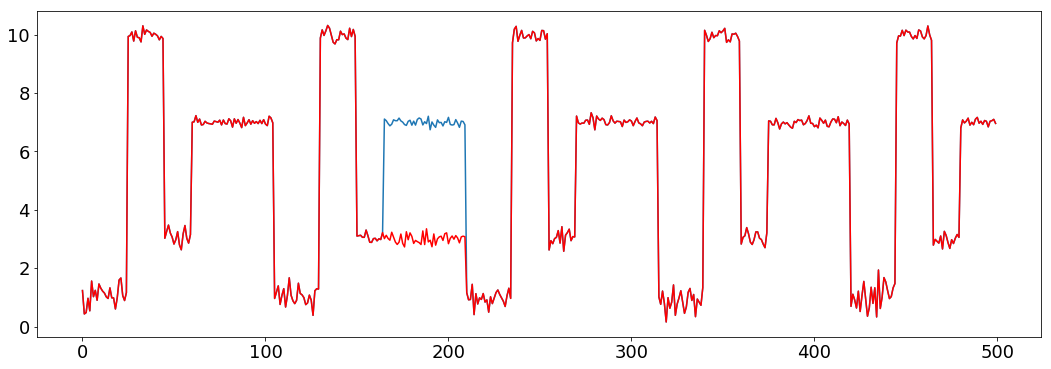

In [6]:
alpha = ['a','b','c','d']
N = 500
n_comp = 4
GenNormal = generator.Sequence(N,alpha, type = 'continue',
                              params={'a': {'len': [25, 25], 'depend_on': False},
                                      'c': {'len': [15, 15], 'depend_on': False},                                       
                                      'b': {'len': [20, 20], 'depend_on': False},
                                      'd': {'len': [45, 45], 'depend_on': False},
                                      'e': {'len': [15, 15], 'depend_on': False}
                                     },     mean = [1, 10 , 3, 7] ,
                                            variance = [0.3, 0.15, 0.2, 0.1, 0.14])

signal_1 = GenNormal.sequence
labels = list(map(myutils.rename_state,GenNormal.path))
anomal = generator.Sequence(N, ['a','b','c','d'],type = 'continue',
                              params={'a': {'len': [15, 15], 'depend_on': False},
                                      'c': {'len': [15, 15], 'depend_on': False},                                       
                                      'b': {'len': [10, 10], 'depend_on': False},
                                      'd': {'len': [40, 40], 'depend_on': False},
                                      'e': {'len': [15, 15], 'depend_on': 'd'}
                                     },     mean = [1, 10 , 3, 7] ,
                                            variance = [0.3, 0.15, 0.2, 0.1, 0.14]).sequence
anomal = GenNormal.get_abnormal_signal()

plt.plot(signal_1)
plt.plot(anomal,'r')
# plt.plot(anomal,'r')

log нормал -576.4731207621809
log аномал -644.1732510374194


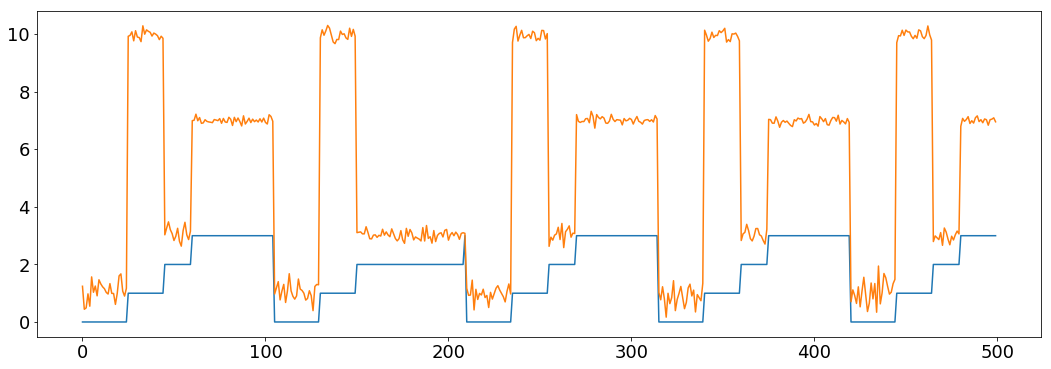

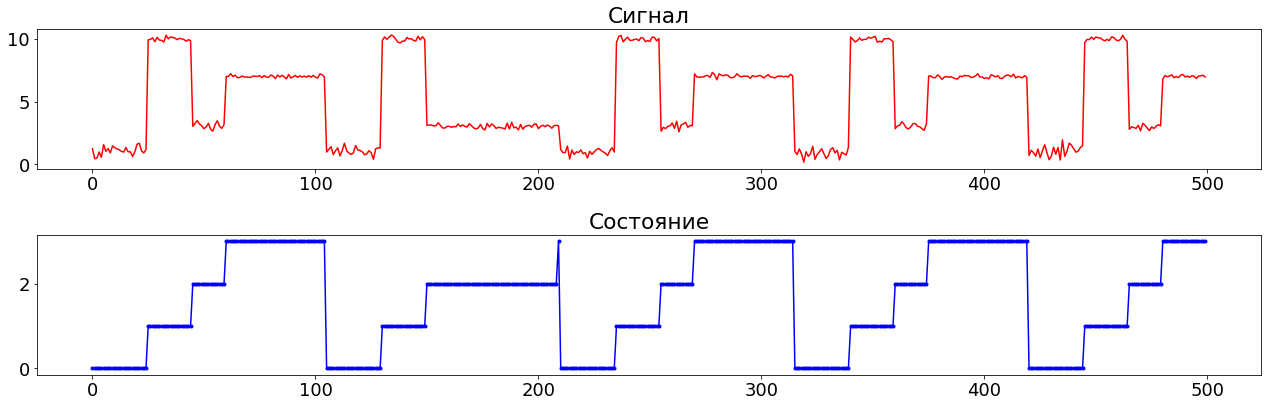

In [7]:
model = HiddenMarkovModel.from_samples(NormalDistribution, n_components = n_comp, X = [signal_1],
                                      labels = [labels], algorithm = 'labeled')
sequence_states = [x[0] for x in model.viterbi(anomal)[1]][1:]


plt.plot(sequence_states)
plt.plot(anomal)
print('log нормал',model.log_probability(signal_1))
print('log аномал',model.log_probability(anomal))

fig, axes = plt.subplots(2,1)
axes[0].plot(anomal,'r')
axes[0].set_title('Сигнал')
axes[1].set_title('Состояние')
axes[1].plot(sequence_states,'b')
axes[1].plot(sequence_states,'b.')
plt.tight_layout()
plt.savefig('состояние.jpeg')

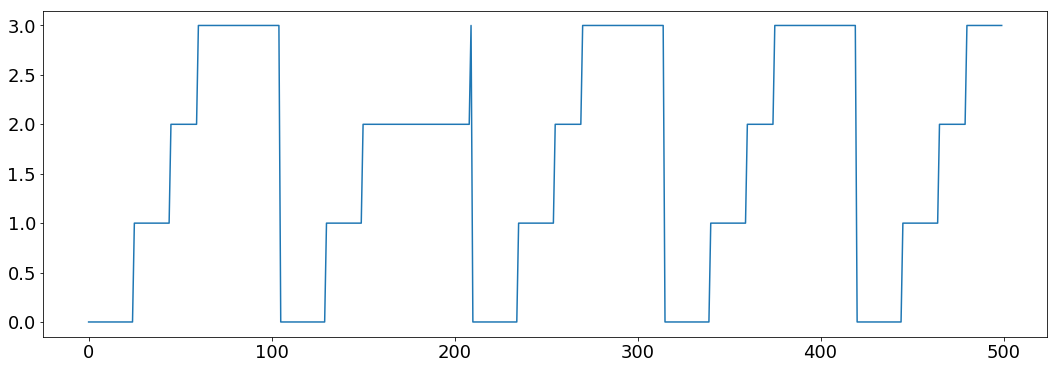

In [13]:
seq_states = model.predict_proba(anomal)
seq_states = [x.argmax() for x in seq_states]
plt.plot(seq_states)

In [8]:
a = 16
if a < 1:
    print('1')
elif a>17:
    print('2')
else:
    print('3')

3


In [48]:
alpha = ['a','b','c','d']
N = 1000
n_comp = 4
GenNormal = generator.Sequence(N,alpha, type = 'continue',
                              params={'a': {'len': [25, 25], 'depend_on': False},
                                      'c': {'len': [15, 15], 'depend_on': 'randomly'},                                       
                                      'b': {'len': [20, 20], 'depend_on': False},
                                      'd': {'len': [45, 45], 'depend_on': False},
                                      'e': {'len': [15, 15], 'depend_on': False}
                                     },     mean = [1, 10 , 3, 7] ,
                                            variance = [0.3, 0.15, 0.2, 0.1, 0.14])

signal_1 = GenNormal.sequence

re
re
re
re
re


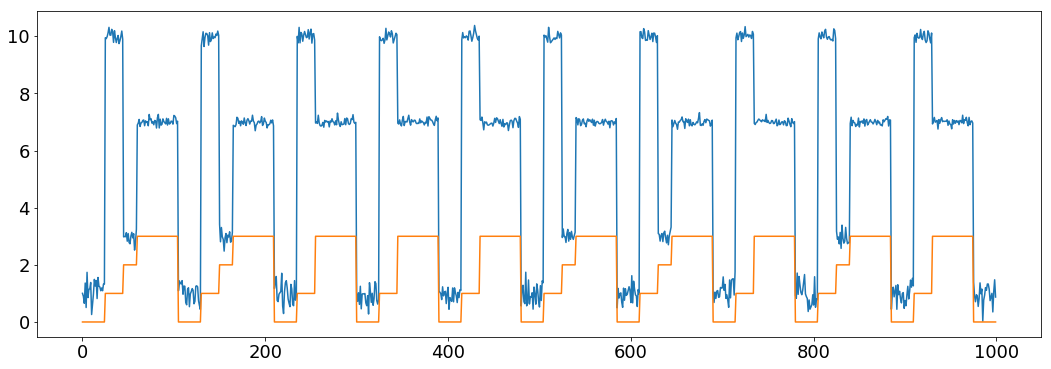

In [52]:
plt.plot(signal_1)
plt.plot(GenNormal.path)